<a href="https://colab.research.google.com/github/sastelvios/data_science_tutorials/blob/main/Brest%20Cancer%20Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Principal Component Analysis (PCA)

**Sastelvio MANUEL**

**Purushottam MALVIYA**

**Yapo JEAN**



## Introduction

Principal Component Analysis (PCA) is a **linear dimensionality reduction** technique that can be utilized for extracting information from a high-dimensional space by projecting it into a lower-dimensional sub-space. It tries to preserve the essential parts that have more variation of the data and remove the non-essential parts with fewer variation.

Dimensions are nothing but features that represent the data. 

One important thing to note about PCA is that it is an **Unsupervised** dimensionality reduction technique, you can cluster the similar data points based on the feature correlation between them without any supervision (or labels).

PCA is a **statistical** procedure that uses an orthogonal transformation to convert a set of observations of possibly correlated variables (entities each of which takes on various numerical values) into a set of values of linearly uncorrelated variables called principal components.

**Note**: Features, Dimensions, and Variables are all referring to the same thing.

#### Where can we apply PCA?

- **Data Visualization**: When working on any data related problem, the challenge in today's world is the sheer volume of data, and the variables/features that define that data. To solve a problem where data is the key, you need extensive data exploration like finding out how the variables are correlated or understanding the distribution of a few variables. Considering that there are a large number of variables or dimensions along which the data is distributed, visualization can be a challenge and almost impossible.

    Hence, PCA can do that for you since it projects the data into a lower dimension, thereby allowing you to visualize the data in a 2D or 3D space with a naked eye.

- **Speeding Machine Learning (ML) Algorithm**: Since PCA's main idea is dimensionality reduction, you can leverage that to speed up your machine learning algorithm's training and testing time considering your data has a lot of features, and the ML algorithm's learning is too slow.

At an abstract level,  you take a dataset having many features, and you simplify that dataset by selecting a few ``Principal Components`` from original features.

#### What is a Principal Component?

Principal components are the key to PCA; they represent what's underneath the hood of your data. In a layman term, when the data is projected into a lower dimension (assume three dimensions) from a higher space, the three dimensions are nothing but the three Principal Components that captures (or holds) most of the variance (information) of your data.

Principal components have both direction and magnitude. The direction represents across which *principal axes* the data is mostly spread out or has most variance and the magnitude signifies the amount of variance that Principal Component captures of the data when projected onto that axis. The principal components are a straight line, and the first principal component holds the most variance in the data. Each subsequent principal component is orthogonal to the last and has a lesser variance. In this way, given a set of <i>x</i> correlated variables over <i>y</i> samples you achieve a set of <i>u</i> uncorrelated principal components over the same <i>y</i> samples.

The reason you achieve uncorrelated principal components from the original features is that the correlated features contribute to the same principal component, thereby reducing the original data features into uncorrelated principal components; each representing a different set of correlated features with different amounts of variation.

Each principal component represents a percentage of total variation captured from the data.

## Understanding the dataset

### Breast Cancer

The Breast Cancer data set is a real-valued multivariate data that consists of two classes, where each class signifies whether a patient has breast cancer or not. The two categories are: malignant and benign.

The malignant class has 212 samples, whereas the benign class has 357 samples.

It has 30 features shared across all classes: radius, texture, perimeter, area, smoothness, fractal dimension, etc.

You can download the breast cancer dataset from <a href="https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+(Diagnostic)">here</a>.


## Data Exploration

Now we will be loading and analyzing the ``Breast Cancer`` dataset. By now you have an idea regarding the dimensionality of the dataset.

#### Breast Cancer Data Exploration


In [1]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn

import matplotlib.pyplot as plt
%matplotlib inline

#To check the time of processing while testing the PCA against other techniques
import time

In [2]:
#uploading the dataset from sklearn.datasets*

from sklearn.datasets import load_breast_cancer
from sklearn.decomposition import PCA

#for data visualization
from sklearn.preprocessing import StandardScaler

#To check the performance of PCA
from sklearn.manifold import TSNE
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

#to Train KNN
from sklearn.neighbors import KNeighborsClassifier

In [3]:
#loading the dataset into the varialble breast
breast = load_breast_cancer()
breast_data = breast.data
breast_data

array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]])

In [4]:
#Check the shape of the data.
breast_data.shape

(569, 30)

In [5]:
#loading the labels of the dataset (1 means you get malignant cancer 0 a benign cancer)
breast_labels = breast.target
breast_labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [6]:
breast_labels.shape


(569,)

Reshape the ``breast_labels`` to concatenate it with the ``breast_data`` to create a ``DataFrame`` which will have both the data and labels.

In [7]:
labels = np.reshape(breast_labels,(569,1))

After ``reshaping`` the labels, we ``concatenate`` the data and labels along the second axis, which means the final shape of the array will be ``569 x 31``.

In [8]:
final_breast_data = np.concatenate([breast_data,labels],axis=1)

In [9]:
final_breast_data.shape

(569, 31)

In [10]:
#Conversion of our nparray dataset into a pandas dataframe

breast_dataset = pd.DataFrame(final_breast_data)

Let's quickly print the features that are there in the breast cancer dataset!


In [11]:
#Preview the features thar are there in the breast cancer dataset
features = breast.feature_names
features

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

On the previous preview (``features``), we can note that the ``label`` field is missing. Hence, we will have to manually add it to the ``features`` array since we will be equating this array with the column names of your ``breast_dataset`` dataframe.


In [12]:
features_labels = np.append(features,'label')

In [13]:
#embed the column names to the breast_dataset dataframe.
breast_dataset.columns = features_labels

In [14]:
#preview the current dataframe shape
breast_dataset.head(10)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0.0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0.0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0.0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0.0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0.0
5,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,0.2087,0.07613,...,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440,0.0
6,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,0.1794,0.05742,...,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368,0.0
7,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,0.2196,0.07451,...,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510,0.0
8,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,0.2350,0.07389,...,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.2060,0.4378,0.10720,0.0
9,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,0.2030,0.08243,...,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.2210,0.4366,0.20750,0.0


Since the original labels are in ``0,1`` format, we changed the labels to ``benign`` and ``malignant`` using ``.replace`` function. We will use ``inplace=True`` which will modify the dataframe ``breast_dataset``.


In [15]:
breast_dataset['label'].replace(0, 'Benign',inplace=True)
breast_dataset['label'].replace(1, 'Malignant',inplace=True)

Let's print the last few rows of the ``breast_dataset``.


In [16]:
#Preview the last 10 rows to see the modifications
breast_dataset.tail(10)


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
559,11.51,23.93,74.52,403.5,0.09261,0.10210,0.11120,0.04105,0.1388,0.06570,...,37.16,82.28,474.2,0.12980,0.25170,0.3630,0.09653,0.2112,0.08732,Malignant
560,14.05,27.15,91.38,600.4,0.09929,0.11260,0.04462,0.04304,0.1537,0.06171,...,33.17,100.20,706.7,0.12410,0.22640,0.1326,0.10480,0.2250,0.08321,Malignant
561,11.20,29.37,70.67,386.0,0.07449,0.03558,0.00000,0.00000,0.1060,0.05502,...,38.30,75.19,439.6,0.09267,0.05494,0.0000,0.00000,0.1566,0.05905,Malignant
562,15.22,30.62,103.40,716.9,0.10480,0.20870,0.25500,0.09429,0.2128,0.07152,...,42.79,128.70,915.0,0.14170,0.79170,1.1700,0.23560,0.4089,0.14090,Benign
563,20.92,25.09,143.00,1347.0,0.10990,0.22360,0.31740,0.14740,0.2149,0.06879,...,29.41,179.10,1819.0,0.14070,0.41860,0.6599,0.25420,0.2929,0.09873,Benign
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.22160,0.2060,0.07115,Benign
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.16280,0.2572,0.06637,Benign
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.14180,0.2218,0.07820,Benign
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.26500,0.4087,0.12400,Benign
568,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,0.1587,0.05884,...,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.00000,0.2871,0.07039,Malignant



## Data Visualization using PCA


### Visualizing the Breast Cancer data

- we start by <b>``Standardizing``</b> the data since PCA's output is influenced based on the scale of the features of the data.
- It is a common practice to normalize your data before feeding it to any machine learning algorithm.

- To apply normalization, you will import ``StandardScaler`` module from the sklearn library and select only the features from the ``breast_dataset`` you created in the Data Exploration step. Once you have the features, you will then apply scaling by doing ``fit_transform`` on the feature data.

- While applying StandardScaler, each feature of our data should be normally distributed such that it will scale the distribution to a mean of zero and a standard deviation of one.



In [17]:
# normalizing the data (make sure that the distibrution of our data is a normal one with a mean of 0 and a standard deviation of one)

x = breast_dataset.loc[:,features].values # assigning the values of all the features (except the labels) into X
x = StandardScaler().fit_transform(x) 

In [18]:
x.shape

(569, 30)

Let's check whether the normalized data has a mean of zero and a standard deviation of one.


In [19]:
np.mean(x),np.std(x)

(-6.826538293184326e-17, 1.0)

Let's convert the normalized features into a tabular format with the help of DataFrame.


In [20]:
feat_cols = ['feature' + str(i) for i in range(x.shape[1])]

In [21]:
normalised_breast = pd.DataFrame(x,columns=feat_cols)

In [22]:
normalised_breast.tail()

,feature0,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,...,feature20,feature21,feature22,feature23,feature24,feature25,feature26,feature27,feature28,feature29
564,2.110995,0.721473,2.060786,2.343856,1.041842,0.219060,1.947285,2.320965,-0.312589,-0.931027,...,1.901185,0.117700,1.752563,2.015301,0.378365,-0.273318,0.664512,1.629151,-1.360158,-0.709091
565,1.704854,2.085134,1.615931,1.723842,0.102458,-0.017833,0.693043,1.263669,-0.217664,-1.058611,...,1.536720,2.047399,1.421940,1.494959,-0.691230,-0.394820,0.236573,0.733827,-0.531855,-0.973978
566,0.702284,2.045574,0.672676,0.577953,-0.840484,-0.038680,0.046588,0.105777,-0.809117,-0.895587,...,0.561361,1.374854,0.579001,0.427906,-0.809587,0.350735,0.326767,0.414069,-1.104549,-0.318409
567,1.838341,2.336457,1.982524,1.735218,1.525767,3.272144,3.296944,2.658866,2.137194,1.043695,...,1.961239,2.237926,2.303601,1.653171,1.430427,3.904848,3.197605,2.289985,1.919083,2.219635
568,-1.808401,1.221792,-1.814389,-1.347789,-3.112085,-1.150752,-1.114873,-1.261820,-0.820070,-0.561032,...,-1.410893,0.764190,-1.432735,-1.075813,-1.859019,-1.207552,-1.305831,-1.745063,-0.048138,-0.751207


- Now comes the critical part, the next few lines of code will be projecting the thirty-dimensional Breast Cancer data to two-dimensional <b>``principal components``</b>.

- You will use the sklearn library to import the ``PCA`` module, and in the PCA method, you will pass the number of components (n_components=2) and finally call fit_transform on the aggregate data. Here, several components represent the lower dimension in which you will project your higher dimension data.



In [23]:
pca_breast = PCA(n_components=2)
principalComponents_breast = pca_breast.fit_transform(x)

Next, let's create a DataFrame that will have the principal component values for all 569 samples.


In [24]:
principal_breast_Df = pd.DataFrame(data = principalComponents_breast
             , columns = ['principal component 1', 'principal component 2'])

In [25]:
principal_breast_Df.tail()

,principal component 1,principal component 2
564,6.439315,-3.576817
565,3.793382,-3.584048
566,1.256179,-1.902297
567,10.374794,1.672010
568,-5.475243,-0.670637


- Once you have the principal components, you can find the <b>``explained_variance_ratio``</b>. It will provide you with the amount of information or variance each principal component holds after projecting the data to a lower dimensional subspace.


In [26]:
print('Explained variation per principal component: {}'.format(pca_breast.explained_variance_ratio_))

Explained variation per principal component: [0.44272026 0.18971182]


From the above output, you can observe that the ``principal component 1`` holds 44.2% of the information while the ``principal component 2`` holds only 19% of the information. Also, the other point to note is that while projecting thirty-dimensional data to a two-dimensional data, 36.8% information was lost.

Let's plot the visualization of the 569 samples along the ``principal component - 1`` and ``principal component - 2`` axis. It should give you good insight into how your samples are distributed among the two classes.


<Figure size 640x480 with 0 Axes>

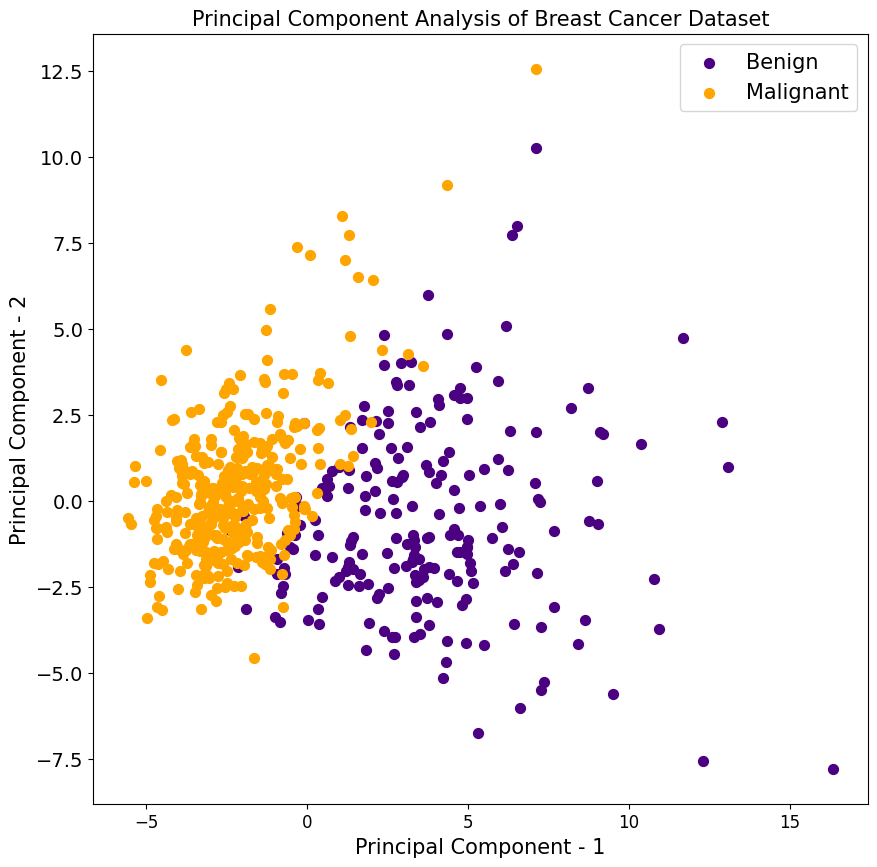

In [27]:
plt.figure()
plt.figure(figsize=(10,10))
plt.xticks(fontsize=12)
plt.yticks(fontsize=14)
plt.xlabel('Principal Component - 1',fontsize=15)
plt.ylabel('Principal Component - 2',fontsize=15)
plt.title("Principal Component Analysis of Breast Cancer Dataset",fontsize=15)
targets = ['Benign', 'Malignant']
colors = ['indigo', 'orange']

for target, color in zip(targets,colors):
    indicesToKeep = breast_dataset['label'] == target
    plt.scatter(principal_breast_Df.loc[indicesToKeep, 'principal component 1']
               , principal_breast_Df.loc[indicesToKeep, 'principal component 2'], c = color, s = 50)

plt.legend(targets,prop={'size': 15});

## Speeding Machine Learning (ML) Algorithm WITH PCA

Here we are comparing the performance of original data with the data processed by PCA, and t-SNE.

t-SNE (t-Distributed Stochastic Neighbor Embedding) is a dimensionality reduction technique used to visualize high-dimensional data in two or three dimensions. Unlike PCA (Principal Component Analysis), which is a linear technique, t-SNE is a non-linear technique that can preserve both global and local structures of the data.

PCA is a linear dimensionality reduction technique that is well-suited for datasets with a large number of features, where many of the features may be redundant or correlated. PCA seeks to find a linear projection of the data that preserves as much of the variance as possible, which can be useful for feature selection or data compression.

t-SNE, on the other hand, is a non-linear dimensionality reduction technique that is better suited for visualizing complex, high-dimensional datasets, where the underlying structure of the data may be difficult to discern in the original space. t-SNE can reveal hidden patterns and relationships that may not be apparent in the original data, making it a popular choice for exploratory data analysis and visualization.

### Accuracy and Performance of PCA

In [28]:
# Split the data into training and testing sets for the original data
X_train_orig, X_test_orig, y_train, y_test = train_test_split(breast_data, breast_labels, test_size=0.3, random_state=42)

In [29]:
# Apply PCA to reduce the dimensionality of the data
start_time = time.time()
pca = PCA(n_components=2)
X_pca = pca.fit_transform(breast_data)
pca_time = time.time() - start_time

# Split the data into training and testing sets for the PCA-reduced data
X_train_pca, X_test_pca, y_train, y_test = train_test_split(X_pca, breast_labels, test_size=0.3, random_state=42)

In [30]:
# Apply t-SNE to reduce the dimensionality of the data
start_time = time.time()
tsne = TSNE(n_components=2, init='pca', learning_rate='auto', perplexity=30, n_iter=1000)
X_tsne = tsne.fit_transform(breast_data)
tsne_time = time.time() - start_time

# Split the data into training and testing sets for the t-SNE-reduced data
X_train_tsne, X_test_tsne, y_train, y_test = train_test_split(X_tsne, breast_labels, test_size=0.3, random_state=42)

### Training KNN

In [31]:
# Train a KNN classifier on the original data
start_time = time.time()
knn_orig = KNeighborsClassifier()
knn_orig.fit(X_train_orig, y_train)
y_pred_orig = knn_orig.predict(X_test_orig)
orig_time = time.time() - start_time


# Evaluate the performance of KNN with the original data
acc_orig_knn = accuracy_score(y_test, y_pred_orig)

print(f"Accuracy of original data: {acc_orig_knn}")

print(f"Time taken for training KNN on original data: {orig_time:.2f} seconds")



Accuracy of original data: 0.9590643274853801
Time taken for training KNN on original data: 0.10 seconds


In [32]:
# Train a KNN classifier on the PCA-reduced data
start_time = time.time()
knn_pca = KNeighborsClassifier()
knn_pca.fit(X_train_pca, y_train)
y_pred_pca = knn_pca.predict(X_test_pca)
pca_knn_time = time.time() - start_time

# Evaluate the performance of KNN with the PCA
acc_pca_knn = accuracy_score(y_test, y_pred_pca)

print(f"Accuracy of PCA-reduced data: {acc_pca_knn}")

#time taken to apply PCA on the data
print(f"Time taken for PCA: {pca_time:.2f} seconds")

#time taken to train the KNN model using the PCA
print(f"Time taken for training KNN on PCA-reduced data: {pca_knn_time:.2f} seconds")

Accuracy of PCA-reduced data: 0.9649122807017544
Time taken for PCA: 0.01 seconds
Time taken for training KNN on PCA-reduced data: 0.01 seconds


In [33]:
# Train a KNN classifier on the t-SNE-reduced data
start_time = time.time()
knn_tsne = KNeighborsClassifier()
knn_tsne.fit(X_train_tsne, y_train)
y_pred_tsne = knn_tsne.predict(X_test_tsne)
tsne_knn_time = time.time() - start_time

# Evaluate the performance of KNN with the t-SNE
acc_tsne_knn = accuracy_score(y_test, y_pred_tsne)

print(f"Accuracy of t-SNE-reduced data: {acc_tsne_knn}")

#time taken to apply i-SNE on the data
print(f"Time taken for t-SNE: {tsne_time:.2f} seconds")

#time taken to train the KNN model using the t-SNE
print(f"Time taken for training KNN on t-SNE-reduced data: {tsne_knn_time:.2f} seconds")

Accuracy of t-SNE-reduced data: 0.935672514619883
Time taken for t-SNE: 10.17 seconds
Time taken for training KNN on t-SNE-reduced data: 0.01 seconds


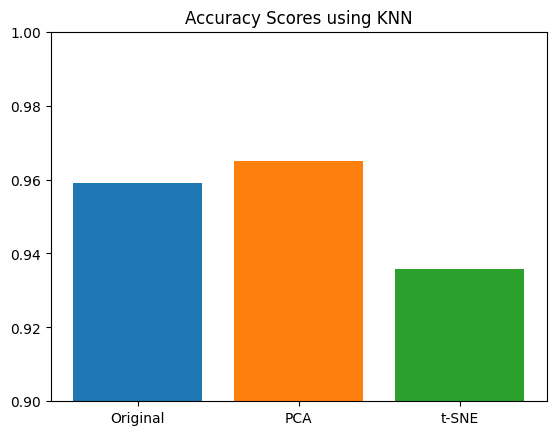

In [34]:
# Plot accuracy results
acc_scores = [acc_orig_knn, acc_pca_knn, acc_tsne_knn]
labels = ['Original', 'PCA', 't-SNE']
colors = ['tab:blue', 'tab:orange', 'tab:green']
plt.bar(labels, acc_scores, color=colors)
plt.ylim(0.9, 1.0)
plt.title('Accuracy Scores using KNN')
plt.show()

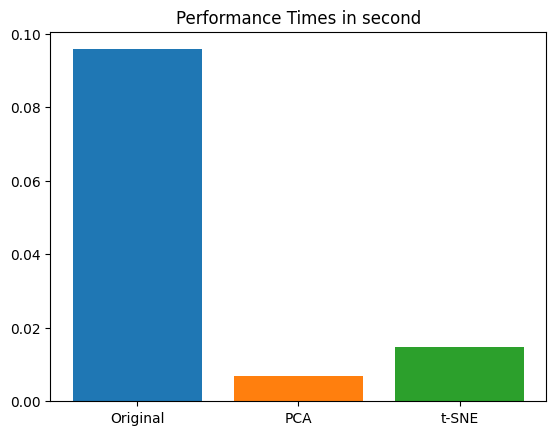

In [35]:
# Plot performance results
performance_times = [orig_time, pca_knn_time, tsne_knn_time]
plt.bar(labels, performance_times, color=colors)
plt.title('Performance Times in second')
plt.show()

From the above output, it is evident that the time taken for training a KNN was better using the PCA processed data in comparison with the original one, we applied the t-SNE also to validate our evaluation, and it had similar results within the same data. However, the acuracy of PCA was better in comparison to the original and t-SNE processed data, making PCA more efficient and effective in overall.

So, by applying PCA on the training data we were able to train our deep learning algorithm not only ``fast``, but it also achieved better ``accuracy`` on the testing data when compared with the deep learning algorithm trained with original training data.

## References

 - <a href="
https://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html">tSNE</a> - which is a non-linear probabilistic dimensionality reduction technique.

 - <a href="https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html">PCA in Sklearn</a>
 - <a href="https://www.datacamp.com/community/tutorials/pca-analysis-r">Principal Component Analysis in R</a>
 - <a href="https://towardsdatascience.com/pca-using-python-scikit-learn-e653f8989e60">PCA using Python (scikit-learn)</a>